# Part-of-speech tagging

Part-of-speech (POS) tagging is the process of labeling each word in a text corpus with its grammatical category, such as noun, verb, adjective, etc. POS tagging helps machines understand the structure of text, which in turn proves useful for tasks such as sentiment analysis or text classification.

During this lab we will be using Python, the pandas and NLTK libraries to explore POS tagging techniques and apply them to real-world text data.

Useful nltk PoS documentation - https://www.nltk.org/book/ch05.html

### Intro

In [12]:
# @title Import Prerequisites { display-mode: "form" }
import nltk
import pandas as pd
from IPython.display import display

# Download the necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('universal_tagset', quiet=True)

print('Imported prerequisites')

Imported prerequisites


In [13]:
# @title Tagging demo { display-mode: "form" }

# Sample text
text = "I like to eat pizza and play video games with my friends."
print('Raw text:', text)

# Tokenize the text
tokens = nltk.word_tokenize(text)
print('Tokenized text:', tokens)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens)

# Explicitly display the pos_tags in a Jupyter-like format
print()
print('Tagged text:', pos_tags)

Raw text: I like to eat pizza and play video games with my friends.
Tokenized text: ['I', 'like', 'to', 'eat', 'pizza', 'and', 'play', 'video', 'games', 'with', 'my', 'friends', '.']

Tagged text: [('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('eat', 'VB'), ('pizza', 'NN'), ('and', 'CC'), ('play', 'VB'), ('video', 'NN'), ('games', 'NNS'), ('with', 'IN'), ('my', 'PRP$'), ('friends', 'NNS'), ('.', '.')]


In [14]:
# @title Convert to DataFrame
# Convert PoS tags to a DataFrame
pos_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
display(pos_df.head())

,Word,PoS
0,I,PRP
1,like,VBP
2,to,TO
3,eat,VB
4,pizza,NN


In [15]:
# @title Count tag frequency
# Count the frequency of each PoS tag and convert it to a dataframe
counts_df = pos_df.groupby('PoS').size().reset_index(name='Count')
display(counts_df)

,PoS,Count
0,.,1
1,CC,1
2,IN,1
3,NN,2
4,NNS,2
5,PRP,1
6,PRP$,1
7,TO,1
8,VB,2
9,VBP,1


NLTK by default uses the Penn Treebank tagset. This tagset is one of the most widely used in English language corpus linguistics. It includes a detailed set of part-of-speech tags, including distinctions among different types of nouns, verbs, adjectives, adverbs, and various punctuation marks, among others.

Here are some examples of tags from the Penn Treebank tagset:

*   NN: Noun, singular or mass
*   NNS: Noun, plural
*   NNP: Proper noun, singular
*   NNPS: Proper noun, plural

**We will, however, switch to the simpler universal_tagset for the remainder of this laboratory.** It helps unify multiple tagsets by allowing conversion from them into the universal_tagset. To do so, simply specify the tagset=universal_tagset when performing tagging.

### POS applied to Jane Austen

In [16]:
# @title Create POS DataFrame { display-mode: "form" }
import requests
import string

# Pride and Prejudice
book_url = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
response = requests.get(book_url)
pride_prejudice = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
pride_prejudice = ''.join(c for c in pride_prejudice if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(pride_prejudice)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

# Convert PoS tags to a DataFrame
pride_prejudice_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
display(pride_prejudice_df)

,Word,PoS
0,The,DET
1,Project,NOUN
2,Gutenberg,NOUN
3,eBook,NOUN
4,of,ADP
...,...,...
130453,to,PRT
130454,hear,VERB
130455,about,ADP
130456,new,ADJ


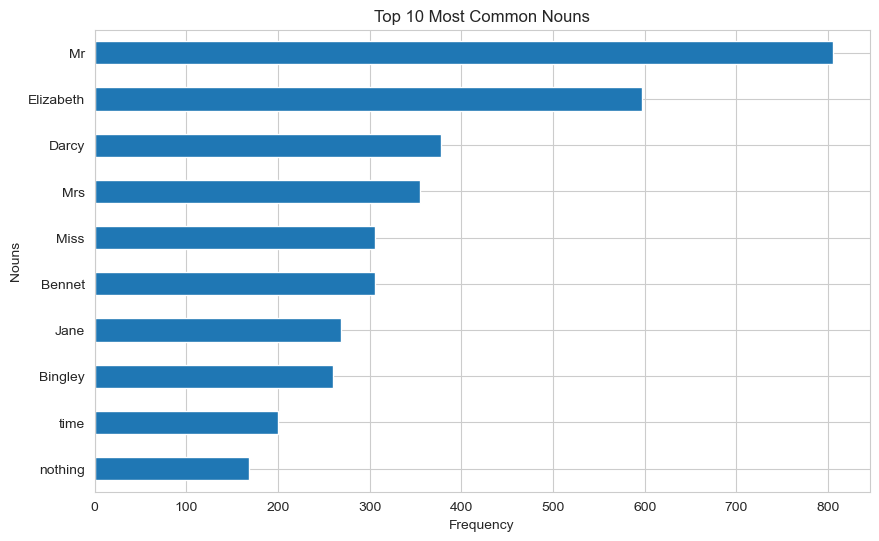

In [17]:
# @title Basic Plotting
import matplotlib.pyplot as plt

# Filter DataFrame for rows where PoS is 'NOUN'
nouns_df = pride_prejudice_df[pride_prejudice_df['PoS'] == 'NOUN']

# Count the occurrences of each noun, find top 10
noun_counts = nouns_df['Word'].value_counts()
top_10_nouns = noun_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot
top_10_nouns.plot(kind='barh') # .plot() draws on your canvas, kind = 'barh' decides the plot type, horizontal bar in this case
plt.title('Top 10 Most Common Nouns')
plt.xlabel('Frequency') # Sets the label for the x-axis to 'Frequency'. In a horizontal bar chart, the x-axis typically represents the scale of measurement, which is the frequency of occurrence for each noun in this case.
plt.ylabel('Nouns') # Sets the label for the y-axis to 'Nouns'. Each bar's label on the y-axis corresponds to a noun from your data, identifying what each bar represents.
plt.xticks(rotation=0) # This adjusts the rotation of the tick labels on the x-axis. Setting it to 45 helps in cases where the labels are too large and would overlap.
plt.gca().invert_yaxis()  # Invert y-axis to start with the highest value at the top. gca() gets a matplotlib object representing the plot area, allowing you to modify it directly.
plt.show() # Displays the plot.

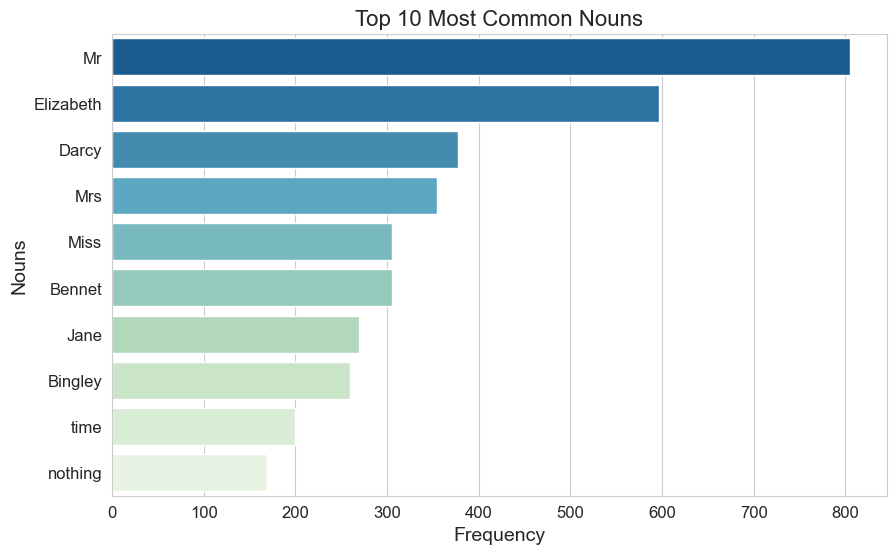

In [18]:
# @title Seaborn Plotting
import seaborn as sns

# Convert the Series to DataFrame for seaborn
top_10_nouns_df = top_10_nouns.reset_index()
top_10_nouns_df.columns = ['Nouns', 'Frequency'] # Converts the Series to a DataFrame and renames columns for clarity, making it compatible with seaborn's data parameter.

# Set the aesthetic style of the plots
sns.set_style("whitegrid") # Applies a white grid background to the plot, providing a clean, modern look that enhances readability.

# Create the plot
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot.
sns.barplot(x='Frequency', y='Nouns', data=top_10_nouns_df, palette="GnBu_r", hue='Nouns') # Draws a horizontal bar plot with 'Nouns' on the y-axis and 'Frequency' on the x-axis. Each noun is colored differently based on the 'Blues_d' palette.

# Add titles and labels
plt.title('Top 10 Most Common Nouns', fontsize=16) # Sets the plot title with a font size of 16.
plt.xlabel('Frequency', fontsize=14) # Sets the label for the x-axis to 'Frequency' with a font size of 14. This label indicates that the x-axis represents the frequency of each noun.
plt.ylabel('Nouns', fontsize=14) # Sets the label for the y-axis to 'Nouns' with a font size of 14. Each bar on the y-axis corresponds to a different noun.
plt.xticks(fontsize=12) # Sets the font size of the x-axis tick labels to 12.
plt.yticks(fontsize=12) # Sets the font size of the y-axis tick labels to 12.

# Show the plot
plt.show() # Displays the plot.

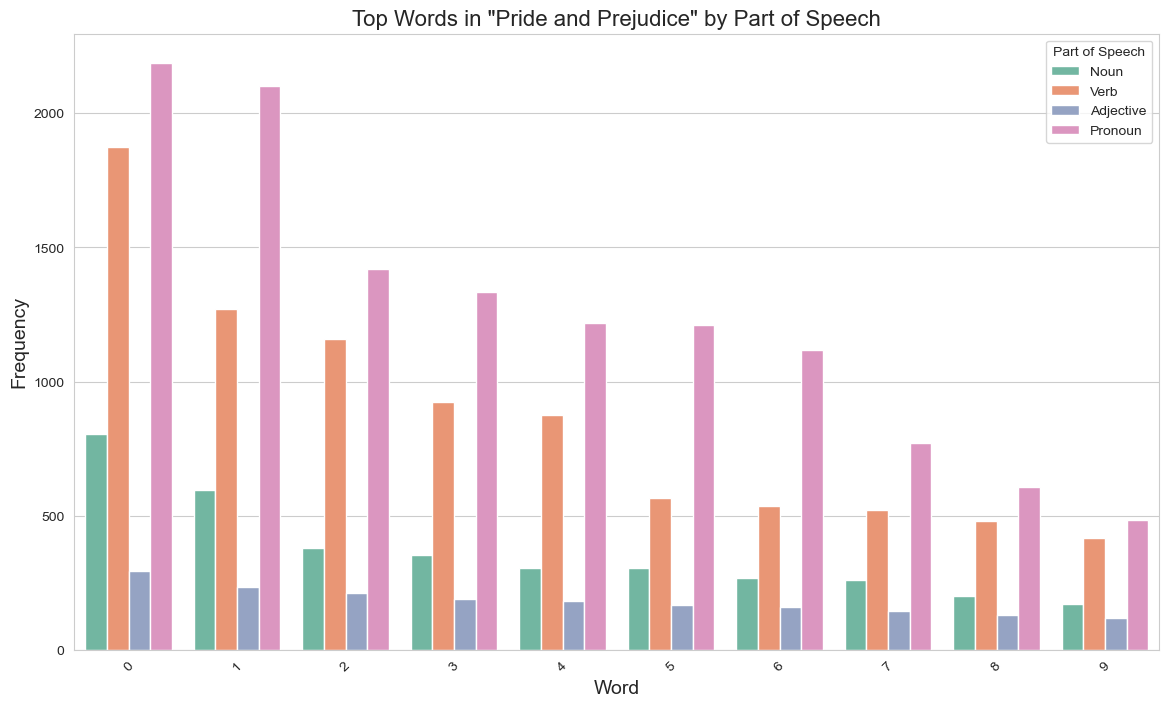

In [19]:
# @title Multi-PoS plot { display-mode: "form" }
# Count occurrences of each PoS and find top 10
noun_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'VERB']['Word'].value_counts().head(10)
adj_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'ADJ']['Word'].value_counts().head(10)
pronoun_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'PRON']['Word'].value_counts().head(10)

# Combine the top words into a single DataFrame
top_words_combined = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='Noun'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='Verb'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='Adjective'),
    pronoun_counts.rename('Frequency').reset_index().assign(PoS='Pronoun')
])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=top_words_combined.index, y='Frequency', hue='PoS', data=top_words_combined, palette='Set2')
plt.title('Top Words in "Pride and Prejudice" by Part of Speech', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Part of Speech')
plt.show()

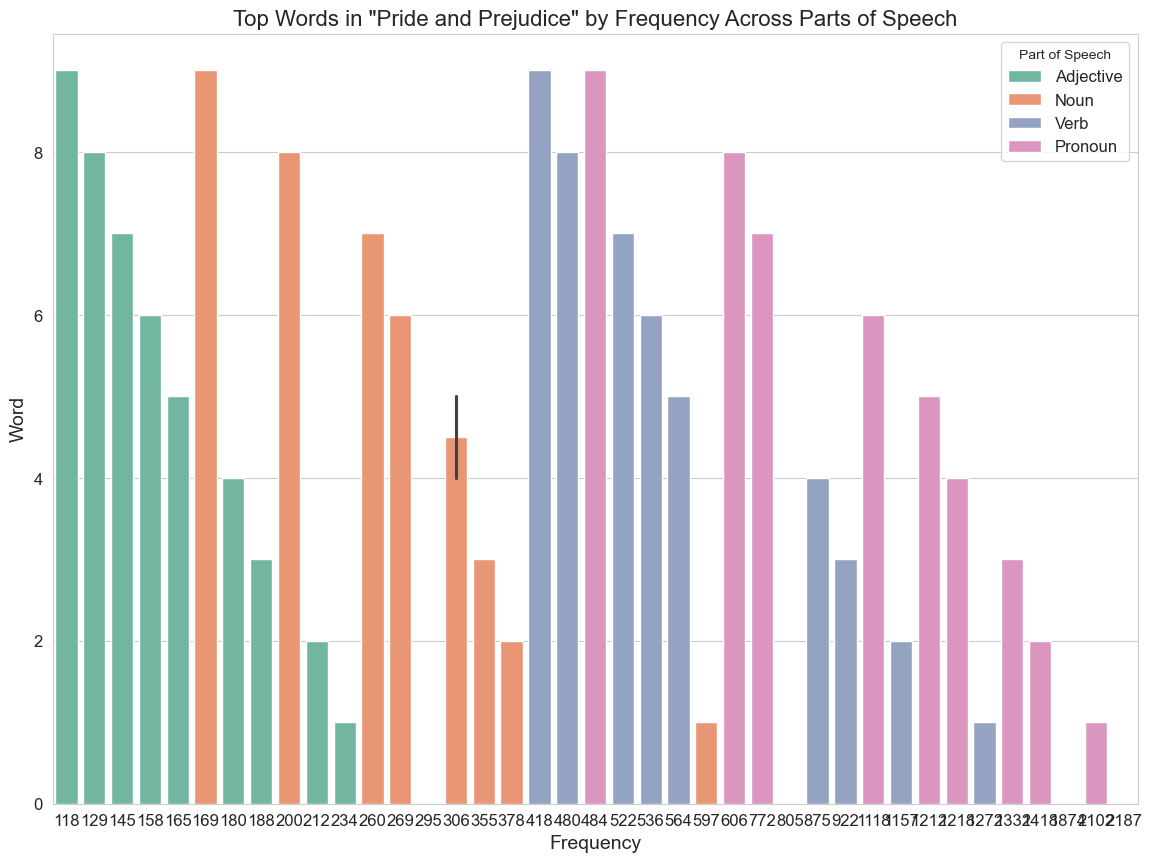

In [20]:
# @title Frequency Sorted Multi-PoS Plot

# Assuming top_words_combined is already created from previous cell
# Sort the DataFrame by 'Frequency' in descending order
top_words_sorted = top_words_combined.sort_values(by='Frequency', ascending=False)

# Plot with sorted values
plt.figure(figsize=(14, 10))
sns.barplot(y=top_words_sorted.index, x='Frequency', hue='PoS', data=top_words_sorted, palette='Set2', dodge=False)
plt.title('Top Words in "Pride and Prejudice" by Frequency Across Parts of Speech', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Part of Speech', fontsize=12)
plt.show()

### Exercise 1

 You are going to analyze and compare linguistic features of two texts from different domains.

1. Use two different books to create a dataframe containing columns for 'Word', 'Part of Speech (PoS)', and 'Book'. The 'Book' column should indicate the source book of each word. Ensure you have data from both a scientific text and a literary work.

2. For each book, calculate the percentage of total words that are nouns, verbs, adjectives, and adverbs. This requires counting the occurrences of these parts of speech and dividing by the total number of words in each book.

3. Create two separate plots, one for each book, displaying the top 10 nouns, adjectives, verbs and adverbs appearing in each text.

4. Draw a sorted plot that displays the top 10 words for each book for a PoS of your choice. This plot will contain 20 values (10/book), each value will need to be the relative frequency of the word with respect to its book of origin (word appearances in book / total words in book). Sort the plot by this relative frequency, not by book of origin.

In [21]:
'''Use two different books to create a dataframe containing columns for 'Word',
    'Part of Speech (PoS)', and 'Book'. The 'Book' column should indicate the 
    source book of each word. 
    Ensure you have data from both a scientific text and a literary work.
'''
print('1 : ')

import requests
import string
import nltk

nltk.download('punkt', quiet = True)
nltk.download('universal_tagset', quiet = True)

# Don Quixote of the Mancha
book_url = 'https://www.gutenberg.org/cache/epub/55106/pg55106.txt'
response = requests.get(book_url)
don_quixote = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
don_quixote = ''.join(c for c in don_quixote if c in allowed_chars)

#How to Do Chemical Tricks
book_url = 'https://www.gutenberg.org/cache/epub/50100/pg50100.txt'
response = requests.get(book_url)
chemical_tricks = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
chemical_tricks = ''.join(c for c in chemical_tricks if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(don_quixote)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

don_quixote_df = pd.DataFrame(pos_tags,columns = ['Word', 'PoS'])
don_quixote_df = don_quixote_df.assign(book = 'Don Quixote of the Mancha')


# Tokenize the text
tokens = nltk.word_tokenize(chemical_tricks)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

chemical_tricks  = pd.DataFrame(pos_tags,columns = ['Word', 'PoS'])
chemical_tricks = chemical_tricks.assign(book = 'How to Do Chemical Tricks')
 

books_df = pd.concat([don_quixote_df, chemical_tricks])
books_df

1 : 


,Word,PoS,book
0,The,DET,Don Quixote of the Mancha
1,Project,NOUN,Don Quixote of the Mancha
2,Gutenberg,NOUN,Don Quixote of the Mancha
3,eBook,NOUN,Don Quixote of the Mancha
4,of,ADP,Don Quixote of the Mancha
...,...,...,...
22608,to,PRT,How to Do Chemical Tricks
22609,hear,VERB,How to Do Chemical Tricks
22610,about,ADP,How to Do Chemical Tricks
22611,new,ADJ,How to Do Chemical Tricks


In [22]:
''' For each book, calculate the percentage of total words that are nouns,
verbs, adjectives, and adverbs. This requires counting the occurrences of
these parts of speech and dividing by the total number of words in each book.'''

print("Don Quixote of the Mancha : ")

nouns_dq_df = don_quixote_df[don_quixote_df['PoS'] == 'NOUN']
total_nouns = len(nouns_dq_df['Word'])
no_of_dq_words = len(don_quixote_df['Word'])
percentage_nouns = total_nouns / no_of_dq_words * 100 
print(f"The percentage of nouns is : {percentage_nouns} %")

verbs_dq_df = don_quixote_df[don_quixote_df['PoS'] == 'VERB']
total_verbs = len(verbs_dq_df['Word'])
no_of_dq_words = len(don_quixote_df['Word'])
percentage_verbs = total_verbs / no_of_dq_words * 100 
print(f"The percentage of verbs is : {percentage_verbs} %")

adjectives_dq_df = don_quixote_df[don_quixote_df['PoS'] == 'ADJ']
total_adjectives= len(adjectives_dq_df['Word'])
no_of_dq_words = len(don_quixote_df['Word'])
percentage_adjectives = total_adjectives / no_of_dq_words * 100 
print(f"The percentage of adjectives is : {percentage_adjectives} %")

adverbs_dq_df = don_quixote_df[don_quixote_df['PoS'] == 'ADV']
total_adverbs = len(adverbs_dq_df['Word'])
no_of_dq_words = len(don_quixote_df['Word'])
percentage_adverbs = total_adverbs / no_of_dq_words * 100 
print(f"The percentage of adverbs is : {percentage_nouns} %")

print("How to Do Chemical Tricks : ")

nouns_dq_df = chemical_tricks[chemical_tricks['PoS'] == 'NOUN']
total_nouns = len(nouns_dq_df['Word'])
no_of_dq_words = len(chemical_tricks['Word'])
percentage_nouns = total_nouns / no_of_dq_words * 100 
print(f"The percentage of nouns is : {percentage_nouns} %")


verbs_dq_df = chemical_tricks[chemical_tricks['PoS'] == 'VERB']
total_verbs = len(verbs_dq_df['Word'])
no_of_dq_words = len(chemical_tricks['Word'])
percentage_verbs = total_verbs / no_of_dq_words * 100 
print(f"The percentage of verbs is : {percentage_verbs} %")


adjectives_dq_df = chemical_tricks[chemical_tricks['PoS'] == 'ADJ']
total_adjectives= len(adjectives_dq_df['Word'])
no_of_dq_words = len(chemical_tricks['Word'])
percentage_adjectives = total_adjectives / no_of_dq_words * 100 
print(f"The percentage of adjectives is : {percentage_adjectives} %")

adverbs_dq_df = chemical_tricks[chemical_tricks['PoS'] == 'ADV']
total_adverbs = len(adverbs_dq_df['Word'])
no_of_dq_words = len(chemical_tricks['Word'])
percentage_adverbs = total_adverbs / no_of_dq_words * 100 
print(f"The percentage of adverbs is : {percentage_nouns} %")

Don Quixote of the Mancha : 
The percentage of nouns is : 23.02650720487573 %
The percentage of verbs is : 20.44316493882364 %
The percentage of adjectives is : 5.350443318071145 %
The percentage of adverbs is : 23.02650720487573 %
How to Do Chemical Tricks : 
The percentage of nouns is : 28.57206031928537 %
The percentage of verbs is : 17.05656038561889 %
The percentage of adjectives is : 7.77428912572414 %
The percentage of adverbs is : 28.57206031928537 %


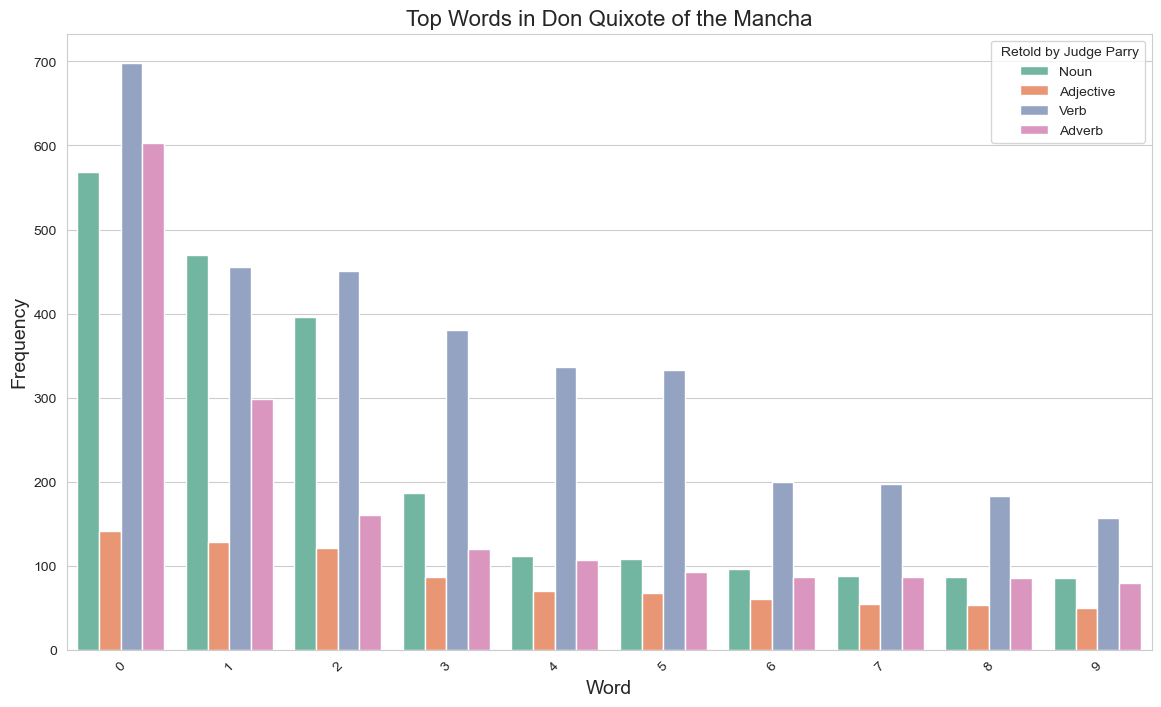

In [23]:
''' Create two separate plots, one for each book, displaying the top 10 nouns, 
adjectives, verbs and adverbs appearing in each text. '''

# @title Basic Plotting
import matplotlib.pyplot as plt

# @title Multi-PoS plot { display-mode: "form" }
# Count occurrences of each PoS and find top 10
noun_counts = don_quixote_df[don_quixote_df['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = don_quixote_df[don_quixote_df['PoS'] == 'ADJ']['Word'].value_counts().head(10)
adj_counts = don_quixote_df[don_quixote_df['PoS'] == 'VERB']['Word'].value_counts().head(10)
pronoun_counts = don_quixote_df[don_quixote_df['PoS'] == 'ADV']['Word'].value_counts().head(10)

# Combine the top words into a single DataFrame
top_words_combined = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='Noun'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='Adjective'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='Verb'),
    pronoun_counts.rename('Frequency').reset_index().assign(PoS='Adverb')
])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=top_words_combined.index, y='Frequency', hue='PoS', data=top_words_combined, palette='Set2')
plt.title('Top Words in Don Quixote of the Mancha', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title=' Retold by Judge Parry')
plt.show()

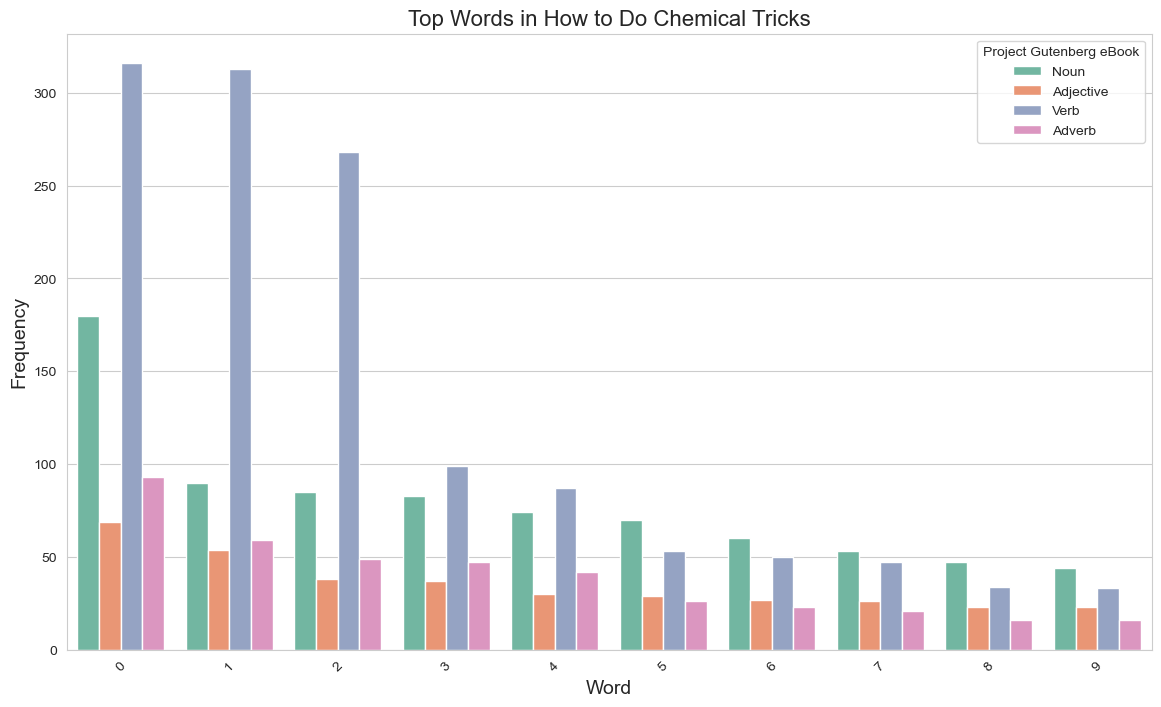

In [24]:
''' Create two separate plots, one for each book, displaying the top 10 nouns, 
adjectives, verbs and adverbs appearing in each text. '''

# @title Basic Plotting
import matplotlib.pyplot as plt

# @title Multi-PoS plot { display-mode: "form" }
# Count occurrences of each PoS and find top 10
noun_counts = chemical_tricks[chemical_tricks['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = chemical_tricks[chemical_tricks['PoS'] == 'ADJ']['Word'].value_counts().head(10)
adj_counts = chemical_tricks[chemical_tricks['PoS'] == 'VERB']['Word'].value_counts().head(10)
pronoun_counts = chemical_tricks[chemical_tricks['PoS'] == 'ADV']['Word'].value_counts().head(10)

# Combine the top words into a single DataFrame
top_words_combined = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='Noun'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='Adjective'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='Verb'),
    pronoun_counts.rename('Frequency').reset_index().assign(PoS='Adverb')
])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=top_words_combined.index, y='Frequency', hue='PoS', data=top_words_combined, palette='Set2')
plt.title('Top Words in How to Do Chemical Tricks', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Project Gutenberg eBook')
plt.show()

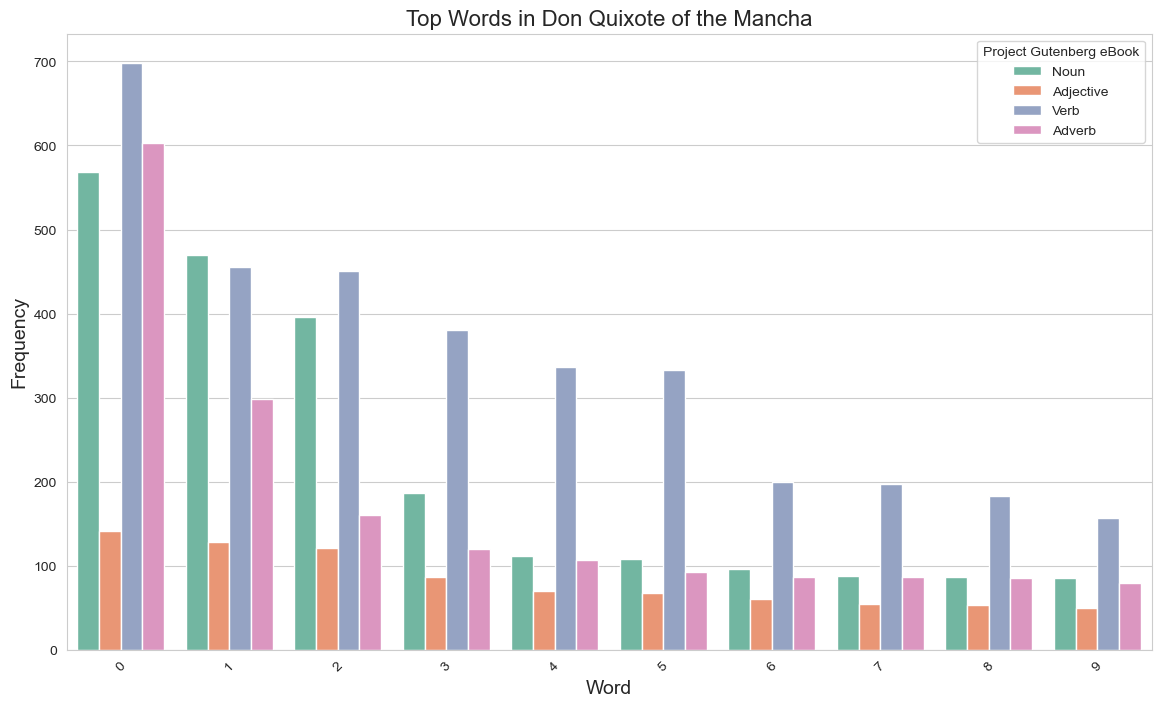

In [25]:
# @title Basic Plotting
import matplotlib.pyplot as plt

# @title Multi-PoS plot { display-mode: "form" }
# Count occurrences of each PoS and find top 10
noun_counts = don_quixote_df[don_quixote_df['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = don_quixote_df[don_quixote_df['PoS'] == 'ADJ']['Word'].value_counts().head(10)
adj_counts = don_quixote_df[don_quixote_df['PoS'] == 'VERB']['Word'].value_counts().head(10)
pronoun_counts = don_quixote_df[don_quixote_df['PoS'] == 'ADV']['Word'].value_counts().head(10)

# Combine the top words into a single DataFrame
top_words_combined = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='Noun'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='Adjective'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='Verb'),
    pronoun_counts.rename('Frequency').reset_index().assign(PoS='Adverb')
])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=top_words_combined.index, y='Frequency', hue='PoS', data=top_words_combined, palette='Set2')
plt.title('Top Words in Don Quixote of the Mancha', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Project Gutenberg eBook')
plt.show()

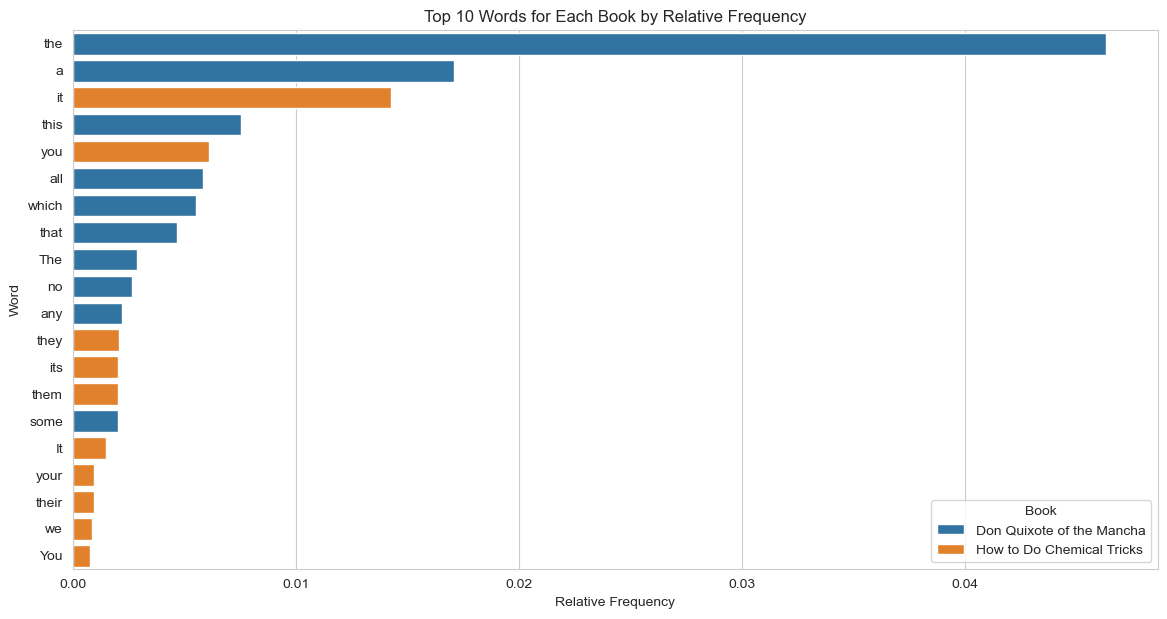

In [26]:
''' Draw a sorted plot that displays the top 10 words for each book for a PoS 
of your choice. This plot will contain 20 values (10/book), 
each value will need to be the relative frequency of the word with respect
to its book of origin (word appearances in book / total words in book). 
Sort the plot by this relative frequency, not by book of origin. '''


total_words_don_quixote = len(don_quixote_df)
total_words_chemical_tricks = len(chemical_tricks)

determiner_counts = (don_quixote_df[don_quixote_df['PoS'] == 'DET']['Word']
                     .value_counts()
                     .head(10) / total_words_don_quixote).reset_index()
determiner_counts.columns = ['Word', 'Relative Frequency']
determiner_counts['Book'] = 'Don Quixote of the Mancha'

pronoun_counts = (chemical_tricks[chemical_tricks['PoS'] == 'PRON']['Word']
                  .value_counts()
                  .head(10) / total_words_chemical_tricks).reset_index()
pronoun_counts.columns = ['Word', 'Relative Frequency']
pronoun_counts['Book'] = 'How to Do Chemical Tricks'

words_combined = pd.concat([determiner_counts, pronoun_counts])
words_combined_sorted = words_combined.sort_values(by='Relative Frequency', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=words_combined_sorted, x='Relative Frequency', y='Word', hue='Book')
plt.title('Top 10 Words for Each Book by Relative Frequency')
plt.xlabel('Relative Frequency')
plt.ylabel('Word')
plt.legend(title='Book')
plt.show()


# Named Entity Recognition

**Named Entity Recognition (NER) is a Natural Language Processing (NLP) technique that involves identifying and classifying named entities in text into predefined categories such as person names, organization names, locations, medical codes, etc.**

This extraction of relevant information about entities from text documents can prove useful in tasks such as information retrieval, question answering, text summarization, sentiment analysis, and more.

Nltk has some built-in NER functionality, but it is slower and relatively old, making it quite far from state of the art. For this reason we are going to use a faster and more power library called **spacy**.

Useful spacy documentation - https://spacy.io/usage/linguistic-features

In [27]:
# @title Import spacy and its NER model { display-mode: "form" }
# Remove comment below if spacy is not installed
#!pip install --quiet spacy

# Spacy has 3 CPU-optimized en_core_web models: sm (small - 12MB), md (medium - 40MB), lg (large - 560MB)
#!python -m spacy download en_core_web_sm --quiet # Install the smallest en_core_web NER model
# Can replace with any of the larger ones if not bottlenecked by network/cpu

import spacy

# Load the pre-trained model
nlp = spacy.load('en_core_web_sm') # Use en_core_web_sm if en_core_web_lg takes too long to download and load, but it will be at the cost of entity recognition accuracy

In [28]:
# @title NER Demo { display-mode: "form" }
from spacy import displacy

# Define the text to be analyzed
text = "Apple is looking at buying U.K. startup for $1 billion"

# Process the text with spaCy into a doc object
doc = nlp(text)

# Each word from our doc is a spacy Token object with plenty of useful attributes associated to it - https://spacy.io/api/token#attributes
for token in doc:
    print('First token:', token.text, token.pos_, token.ent_type_) # word, part of speech, entity (where available)
    break # we'll stop at first token

# Generate a highlighted visualization of the named entities in the text using displacy
displacy.render(doc, style='ent', jupyter=True)

First token: Apple PROPN ORG


In [29]:
# @title Redact names with NER
# Define the text to be analyzed
before_text = "John Smith is a software engineer at Google. He works with Emily White, a data scientist from Boston. Their work involves handling data from European clients."
after_text = before_text

# Process the text with spaCy
doc = nlp(before_text)



# Entities to redact
entities_to_redact = ['PERSON', 'ORG', 'GPE', 'NORP']

# Create a list to hold redacted entities to handle overlaps and repetitions
redactions = []

# Iterate over each named entity in the document
for ent in doc.ents:
    # If the named entity is of a type that needs to be redacted
    if ent.label_ == 'PERSON' and ent.text not in redactions:
        after_text = after_text.replace(ent.text, '[REDACTED]')
        redactions.append(ent.text)  # Add to redactions list to avoid repeat replacements

print("Before Redaction:")
print(before_text)

print("After Redaction:")
print(after_text)

Before Redaction:
John Smith is a software engineer at Google. He works with Emily White, a data scientist from Boston. Their work involves handling data from European clients.
After Redaction:
[REDACTED] is a software engineer at Google. He works with [REDACTED], a data scientist from Boston. Their work involves handling data from European clients.


### Exercise 2 - Play a game with your colleagues

Find an English wikipedia article about a famous person, character, organization or event of your choice.


**Redact 4 entity types of your choice from the text.**


**Show the final (redacted) text to a colleague and see if they can tell who the wiki page is about.**

Below you have an example of how to get a wikipedia article based on id and access its content. [Here](https://www.kaggle.com/code/curiousprogrammer/entity-extraction-and-classification-using-spacy?cellId=9&cellIds=9&kernelSessionId=11364473#SpaCy-recognizes-the-following-built-in-entity-types:) you can find the entities supported by spacy, scroll down if not auto-routed.

In [30]:
# We'll use the wikipedia python package to get our page
!pip install wikipedia --quiet

In [31]:
# @title Wiki Example { vertical-output: true, display-mode: "both" }
import wikipedia

# Fetch a wiki page
page = wikipedia.page(pageid='51853') # Example ID for John Doe, find ID by going to Tools -> Page Information -> Page ID

content = page.content
display(content)

'John Doe (male) and Jane Doe (female) are multiple-use placeholder names that are used in the United States and the United Kingdom when the true name of a person is unknown or is being intentionally concealed. In the context of law enforcement in the United States, such names are often used to refer to a corpse whose identity is unknown or cannot be confirmed. These names are also often used to refer to a hypothetical "everyman" in other contexts, like John Q. Public or "Joe Public". There are many variants to the above names, including John (or Richard)/Jane Roe, John/Jane Smith, John/Jane Bloggs, and Johnie/Janie Doe or just Baby Doe for children.\nA. N. Other is also a placeholder name, mainly used in the United Kingdom, which is gender neutral.\n\n\n== In criminal investigation ==\nIn other English-speaking countries, unique placeholder names, numbers or codenames have become more often used in the context of police investigations. This has included the United Kingdom, where usage

In [32]:
# Write your code below
import wikipedia

# Fetch a wiki page
page = wikipedia.page(pageid='736') # Example ID for John Doe, find ID by going to Tools -> Page Information -> Page ID

content = page.content
after_redaction = content
doc = nlp(content)

entities_to_redact = ['PERSON','NORP','GPE','DATE']

redactions = []

for ent in doc.ents:
        if ent.label_ in entities_to_redact and ent.text not in redactions:
           after_redaction  = after_redaction.replace(ent.text, '[REDACTED]')
           redactions.append(ent.text)

print(after_redaction)




[REDACTED] ( EYEN-styne; [REDACTED]: [ˈalbɛɐt ˈʔaɪnʃtaɪn] ; [REDACTED] – [REDACTED]) was a [REDACTED]-born theoretical physicist who is widely held as one of the most influential scientists. Best known for developing the theory of relativity, [REDACTED] also made important contributions to quantum mechanics. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been called "the world's most famous equation". He received the [REDACTED] Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His intellectual achievements and originality have made the word [REDACTED] broadly synonymous with genius. 
Born in the [REDACTED] Empire, [REDACTED] moved to [REDACTED] in [REDACTED], forsaking his [REDACTED] citizenship (as a subject of [REDACTED]) [REDACTED]. In [REDACTED], at [REDACTED], he enrolled in the mathematics and physics 

### Word dependency parsing
Dependency parsing can be used to extract specific information from a text, such as the subject and object of a sentence or the relationship between two entities. This information can be used to get structured data from unstructured text, which can be useful for tasks such as question answering, knowledge graph construction, etc.



In [33]:
# @title Token dependency demo
sentence = "The cat sat on the mat."

doc = nlp(sentence)

displacy.render(doc, style="dep", options={"compact": True}, jupyter=True)

for token in doc:
    print('Token -', token.text)
    print('Dependency -', token.dep_)
    print('Connected token -', token.head.text)
    break

Token - The
Dependency - det
Connected token - cat


In [34]:
# @title Naive question generator { display-mode: "form" }
def generate_question(sentence):
    # Process the input sentence with spaCy to get a Doc object containing linguistic annotations
    doc = nlp(sentence)

    # Initialize variables to hold the subject, verb, and object found in the sentence
    subject = None
    verb = None
    obj = None

    # Iterate over each token (word) in the processed sentence
    for token in doc:
        # If the token's dependency label is 'nsubj' (nominal subject), store its text as the subject
        if token.dep_ == "nsubj":
            subject = token.text
        # If the token is the root of the sentence (main verb), store its lemma as the verb
        # The lemma is the base form of the word, ensuring consistency (e.g., "run" instead of "runs" or "running")
        elif token.dep_ == "ROOT":
            verb = token.lemma_
        # If the token's dependency label is 'dobj' (direct object), store its text as the object
        elif token.dep_ == "dobj":
            obj = token.text

    # Check if both subject and verb were found in the sentence
    if subject is not None and verb is not None:
        # If an object is also found, formulate a question asking what the subject did (verb) to the object
        if obj is not None:
            question = f"What did {subject} {verb}?"
        # If no object is found, formulate a more general question about what the subject does
        else:
            question = f"What does {subject} {verb}?"
        # Return the generated question
        return question
    else:
        # If no subject or verb could be identified, indicate that a question cannot be generated
        print("No subject or verb found")
        return None

# Example usage of the function
input_sentence = "Michael sent her flowers"
# Call the function with the input sentence and store the generated question
question = generate_question(input_sentence)
# Print the generated question
print("Generated question:", question)

Generated question: What did Michael send?


### Exercise 3
Create a text summarizer using NER and dependency parsing.

1. Implement a Key Sentence Extractor:

    Use spaCy to process a given text and identify the most important sentences based on number of named entity occurences.
    Extract the top 10% (can make this parameter adjustable) of sentences deemed most important and return them as a list.

2. Summarize Extracted Sentences:
    *  For each sentence extracted in Part 1, further process it to identify its main subject, verb (root), and direct object (if present) using spaCy's dependency parsing.
    *  Construct a simplified summary sentence that uses these 3 components that should capture the essence of the original sentence.
    *  Return a list of these summarized sentences.
3. Extend the Summarization to add more useful information.

    Enhance your summarization function from Part 2 to also consider and include prepositional phrases or indirect objects related to the main verb, aiming to add more context and detail to each summary sentence.


In [35]:
# Example text
text = """
Google, based in Mountain View, unveiled the new Pixel at a conference in New York.
Sundar Pichai, CEO of Google, announced the product.
The conference was attended by over 5,000 people, including journalists from major tech publications.
Meanwhile, Apple has been silent about its upcoming products, sparking speculation among fans.
"""

# Possible output for key sentences (1): Google, based in Mountain View, unveiled the new Pixel at a conference in New York. (We only have 4 sentences, so top 10% of those will just mean top 1 sentence)
# Possible output for summary of key sentences (2): Google unveil Pixel.
# Example possible output for advanced summary of key sentences (3): Google unveil new Pixel. / Google unveil Pixel at conference in New York / etc.

# Write your code below
"""Implement a Key Sentence Extractor:

Use spaCy to process a given text and identify the most important 
sentences based on number of named entity occurences. Extract the top 10% 
(can make this parameter adjustable) 
of sentences deemed most important and return them as a list."""

def process_text(text,percentage = 10):
    
    doc = nlp(text)
    sentences = list(doc.sents)
    entity = ['ORG']
    entities_number = []
    for sent in sentences:
        named_entities = [ent for ent in sent.ents]
        entities_number.append((sent, len(named_entities)))

    entities_number = sorted(entities_number, key=lambda x : x[1], reverse=True)
    num_sentences = max(1, int(len(sentences) * (percentage / 100)))
    top_sentences = [sent[0].text for sent in entities_number[:num_sentences]]

    return top_sentences


most_important_sentences = process_text(text, percentage=10)
for sentence in most_important_sentences:
    print(sentence)
    
    



Google, based in Mountain View, unveiled the new Pixel at a conference in New York.



In [36]:
"""Summarize Extracted Sentences:

For each sentence extracted in Part 1, further process it to identify its
main subject, verb (root), and direct object (if present) using spaCy's dependency 
parsing.
Construct a simplified summary sentence that uses these 3 components that should
capture the essence of the original sentence.
Return a list of these summarized sentences."""

def summarize_sentences(sentence):
    doc = nlp(sentence)
    
    subject = None
    verb = None
    obj = None

    for token in doc:
        if token.dep_ == 'nsubj':
            subject = token.text
        elif token.dep_ == 'ROOT':
            verb = token.lemma_
        elif token.dep_== 'dobj':
            obj = token.text
            
    if subject is not None and verb is not None:
        sentence = f"{subject} {verb} "
        if obj is not None:
            sentence += f"{obj}"
        return sentence 
    else:
        print("No sentence")
    return None
    
summarized_sentences = []   

most_important_sentences = process_text(text, percentage=10)
for sentence in most_important_sentences:
    summary = summarize_sentences(sentence)
    if summary:
        summarized_sentences.append(summary)
       
for summary in summarized_sentences:
    print(summary)
    
        

    

Google unveil Pixel


In [37]:
"""Extend the Summarization to add more useful information.

Enhance your summarization function from Part 2 to also consider and include 
prepositional phrases or indirect objects related to the main verb, aiming to add 
more context and detail to each summary sentence."""

def summarize_sentences(sentence):
    doc = nlp(sentence)

    subject = None
    verb = None
    obj = None
    prepositional_phrases = []
    indirect_object = None
    compounds = []
    
    for token in doc:
        if token.dep_ == 'nsubj':
            subject = token.text
            for child in token.children:
                if child.dep_ == 'compound':
                    subject = child.text + ' ' + subject
        elif token.dep_ == 'ROOT':
            verb = token.lemma_
            for child in token.children:
                if child.dep_ == 'prep':
                    prep_phrase = child.text + " " + " ".join([t.text for t in child.children])
                    prepositional_phrases.append(prep_phrase)
                elif child.dep_ == 'dative':
                    indirect_object = child.text
                elif child.dep_ == 'compound':
                    compounds.append(child.text)
        elif token.dep_ == 'dobj':
            obj = token.text
            for child in token.children:
                if child.dep_ == 'compound':
                    obj = child.text + ' ' + obj
    
    if subject is not None and verb is not None:
        summary = f"{subject} {verb}"
        if obj is not None:
            summary += f" {obj}"
        if indirect_object is not None:
            summary += f" to {indirect_object}"
        if prepositional_phrases:
            summary += f" {' '.join(prepositional_phrases)}"
        if compounds:
            summary += f" {' '.join(compounds)}"
        return summary

    return None
    
summarized_sentences = []   

most_important_sentences = process_text(text, percentage=20)
for sentence in most_important_sentences:
    summary = summarize_sentences(sentence)
    if summary:
        summarized_sentences.append(summary)
       
for summary in summarized_sentences:
    print(summary)
    
 

Google unveil Pixel at conference


# Exercise 4
Explore patterns in text through PoS/NER tagging.

1. Construct a dataframe from **four long-form texts** (>5000 words), each coming from distinct genres (e.g., fiction, non-fiction, academic, history, etc.). The dataframe should contain the **genre, word, NER and PoS columns**.

    NER column will contain the **entity type** of the word (e.g. person, date) obtained using spacy, PoS column will contain the **PoS tag** of the word (e.g. verb, noun) obtained using spacy or nltk.

2. Select a part of speech of your choice (e.g. VERB, ADJECTIVE, ..) and plot the top 10 word occurrences for that POS for each genre. Can use 4 separate plots or do it all in one.

3. Compute and plot the frequency of all different entity types **grouped by genre**. Visualize this distribution with a bar chart, highlighting which entities are most common in different domains. You can use either absolute (number of occurrences) or relative values (number of occurrences / total words in genre) in your visualizations. Similarly to 4.2, design of the plot is up to you.

4. Calculate and plot the distribution of POS tags among genres.  Use a pie chart to illustrate the proportion of different parts of speech, providing insights into the linguistic preferences of each domain's texts. Absolute or relative values are again up for choice. One or 4 plots up for choice.


In [ ]:
"""Construct a dataframe from four long-form texts (>5000 words), each coming from
distinct genres (e.g., fiction, non-fiction, academic, history, etc.). The dataframe
should contain the genre, word, NER and PoS columns.

NER column will contain the entity type of the word (e.g. person, date) obtained
using spacy, PoS column will contain the PoS tag of the word (e.g. verb, noun) 
obtained using spacy or nltk."""


import requests
import string
import nltk
import spacy

nltk.download('punkt', quiet = True)
nltk.download('universal_tagset', quiet = True)
nlp = spacy.load('en_core_web_sm')

nlp.max_length = 14000000
the_voice_of_the_void_url = "https://www.gutenberg.org/cache/epub/73952/pg73952.txt"
response = requests.get(the_voice_of_the_void_url)
voice_of_the_void = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
voice_of_the_void = ''.join(c for c in voice_of_the_void if c in allowed_chars)


scarlet_fever_url = "https://www.gutenberg.org/cache/epub/26008/pg26008.txt"
response = requests.get(scarlet_fever_url)
scarlet_fever = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
scarlet_fever = ''.join(c for c in scarlet_fever if c in allowed_chars)


the_value_of_money_url = "https://www.gutenberg.org/cache/epub/34823/pg34823.txt"
response = requests.get(the_value_of_money_url)
the_value_of_money = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
the_value_of_money = ''.join(c for c in the_value_of_money if c in allowed_chars)

mounted_police_url = "https://www.gutenberg.org/cache/epub/4633/pg4633.txt"
response = requests.get(mounted_police_url)
mounted_police = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
mounted_police = ''.join(c for c in mounted_police if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(scarlet_fever)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

scarlet_fever_df = pd.DataFrame(pos_tags,columns = ['Word', 'PoS'])
scarlet_fever_df = scarlet_fever_df.assign(genre = 'Academic')

tokens = nltk.word_tokenize(scarlet_fever)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

voice_of_the_void_df = pd.DataFrame(pos_tags,columns = ['Word', 'PoS'])
voice_of_the_void_df = voice_of_the_void_df.assign(genre = 'Science fiction')

tokens = nltk.word_tokenize(voice_of_the_void)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

the_value_of_money_df = pd.DataFrame(pos_tags,columns = ['Word', 'PoS'])
the_value_of_money_df = the_value_of_money_df.assign(genre = 'Finance')

tokens = nltk.word_tokenize(the_value_of_money)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

mounted_police_df = pd.DataFrame(pos_tags,columns = ['Word', 'PoS' ])
mounted_police_df = mounted_police_df.assign(genre = 'Fiction')
tokens = nltk.word_tokenize(mounted_police)
books = [voice_of_the_void_df, scarlet_fever_df, the_value_of_money_df,mounted_police_df]
books_df = pd.concat(books)
text_word = " ".join(books_df['Word'])
doc = nlp(text_word)

ners = {token.text: '0' for token in doc}

for ent in doc.ents:
    for token in ent:
        ners[token.text] = ent.label_
        
books_df['NER'] = books_df['Word'].map(ners)
display(books_df)



In [ ]:
"""Select a part of speech of your choice (e.g. VERB, ADJECTIVE, ..) and plot 
the top 10 word occurrences for that POS for each genre. Can use 4 separate plots
or do it all in one."""

import matplotlib.pyplot as plt

verbs_df = voice_of_the_void_df[voice_of_the_void_df['PoS'] == 'VERB']
verb_counts = verbs_df.groupby('genre')['Word'].value_counts()
top_10_verbs = verb_counts.head(10).reset_index()

# Plotting
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot
top_10_verbs.plot(kind='barh',x='Word',y='count', legend = False) # .plot() draws on your canvas, kind = 'barh' decides the plot type, horizontal bar in this case
plt.title('Top 10 Most Common Verbs in The voice of the void')
plt.xlabel('Frequency') # Sets the label for the x-axis to 'Frequency'. In a horizontal bar chart, the x-axis typically represents the scale of measurement, which is the frequency of occurrence for each noun in this case.
plt.ylabel('Verbs') # Sets the label for the y-axis to 'Nouns'. Each bar's label on the y-axis corresponds to a noun from your data, identifying what each bar represents.
plt.xticks(rotation=0) # This adjusts the rotation of the tick labels on the x-axis. Setting it to 45 helps in cases where the labels are too large and would overlap.
plt.gca().invert_yaxis()  # Invert y-axis to start with the highest value at the top. gca() gets a matplotlib object representing the plot area, allowing you to modify it directly.
plt.show() # Displays the plot.


In [ ]:
import seaborn as sns 

verbs_df = scarlet_fever_df[scarlet_fever_df['PoS'] == 'VERB']
verb_counts = verbs_df.groupby('genre')['Word'].value_counts()
top_10_verbs = verb_counts.head(10).reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid") # Applies a white grid background to the plot, providing a clean, modern look that enhances readability.

# Create the plot
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot.
sns.barplot(x='genre', y='Word', data=top_10_verbs, palette="GnBu_r", hue='count') # Draws a horizontal bar plot with 'Nouns' on the y-axis and 'Frequency' on the x-axis. Each noun is colored differently based on the 'Blues_d' palette.

# Add titles and labels
plt.title('Top 10 Most Common Verbs', fontsize=16) # Sets the plot title with a font size of 16.
plt.xlabel('Genre', fontsize=14) # Sets the label for the x-axis to 'Frequency' with a font size of 14. This label indicates that the x-axis represents the frequency of each noun.
plt.ylabel('Word', fontsize=14) # Sets the label for the y-axis to 'Nouns' with a font size of 14. Each bar on the y-axis corresponds to a different noun.
plt.xticks(fontsize=12) # Sets the font size of the x-axis tick labels to 12.
plt.yticks(fontsize=12) # Sets the font size of the y-axis tick labels to 12.

# Show the plot
plt.show() # Displays the plot.



In [ ]:
verbs_df = the_value_of_money_df[the_value_of_money_df['PoS'] == 'VERB']
verb_counts = verbs_df.groupby('genre')['Word'].value_counts()
top_10_verbs = verb_counts.head(10).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_verbs.index, y='Word', hue='count', data=top_10_verbs, palette='Set2')
plt.title('Top Verbs in "The Value of money"', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Word ', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='the Value of money')
plt.show()



In [ ]:
verbs_df = mounted_police_df[mounted_police_df['PoS'] == 'VERB']
verb_counts = verbs_df.groupby('genre')['Word'].value_counts()
top_10_verbs = verb_counts.head(10).reset_index()


# Set the aesthetic style of the plots
sns.set_style("whitegrid") # Applies a white grid background to the plot, providing a clean, modern look that enhances readability.

# Create the plot
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot.
sns.barplot(x='genre', y='Word', data=top_10_verbs, palette="GnBu_r", hue='count') # Draws a horizontal bar plot with 'Nouns' on the y-axis and 'Frequency' on the x-axis. Each noun is colored differently based on the 'Blues_d' palette.

# Add titles and labels
plt.title('Top 10 Most Common Verbs', fontsize=16) # Sets the plot title with a font size of 16.
plt.xlabel('Genre', fontsize=14) # Sets the label for the x-axis to 'Frequency' with a font size of 14. This label indicates that the x-axis represents the frequency of each noun.
plt.ylabel('Word', fontsize=14) # Sets the label for the y-axis to 'Nouns' with a font size of 14. Each bar on the y-axis corresponds to a different noun.
plt.xticks(fontsize=12) # Sets the font size of the x-axis tick labels to 12.
plt.yticks(fontsize=12) # Sets the font size of the y-axis tick labels to 12.

# Show the plot
plt.show() # Displays the plot.

display(top_10_verbs)

In [ ]:
"""Compute and plot the frequency of all different entity types
grouped by genre. Visualize this distribution with a bar chart, 
highlighting which entities are most common in different domains.
You can use either absolute (number of occurrences) or relative values
(number of occurrences / total words in genre) in your visualizations. 
Similarly to 4.2, design of the plot is up to you."""
#display(books_df)

import matplotlib.pyplot as plt
import seaborn as sns

books_df = books_df[~books_df['NER'].isin(['0', '\n', ' '])]


entity_df =  books_df.groupby(['genre', 'NER']).size().reset_index(name='Occurrences')

total_words_per_genre = books_df.groupby('genre').size().reset_index(name='TotalWords')
#print(total_words_per_genre)
entity_df = entity_df.merge(total_words_per_genre, on ='genre')
#display(entity_df)
entity_df['RelativeFrequency'] = entity_df['Occurrences'] / entity_df['TotalWords']
display(entity_df)


sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(data=entity_df, x='genre', y='Occurrences', hue='NER')
plt.title('Frequency of Entity Types by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Occurrences')
plt.legend(title='Entity Type')
plt.show()

# Plotting the relative frequency
plt.figure(figsize=(14, 8))
sns.barplot(data=entity_df, x='genre', y='RelativeFrequency', hue='NER')
plt.title('Relative Frequency of Entity Types by Genre')
plt.xlabel('Genre')
plt.ylabel('Relative Frequency ')
plt.legend(title='Entity Type')
plt.show()

In [ ]:
"""Calculate and plot the distribution of POS tags among genres. 
Use a pie chart to illustrate the proportion of different parts of speech, 
providing insights into the linguistic preferences of each domain's texts.
Absolute or relative values are again up for choice. One or 4 plots up for choice."""

pos_tag_df =  books_df.groupby(['genre', 'PoS']).size().reset_index(name='Proportion')

total_words_per_genre = books_df.groupby('genre').size().reset_index(name='TotalWords')
#print(total_words_per_genre)
pos_tag_df  = pos_tag_df .merge(total_words_per_genre, on ='genre')
#display(entity_df)
pos_tag_df['RelativeFrequency'] = pos_tag_df['Proportion'] / pos_tag_df['TotalWords']
display(pos_tag_df)

genres = pos_tag_df['genre'].unique()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Create a 2x2 grid of subplots

for i, genre in enumerate(genres):
    ax = axs[i //2, i % 2]
    genre_data = pos_tag_df[pos_tag_df['genre'] == genre]
    labels = genre_data['PoS']
    sizes = genre_data['RelativeFrequency']

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'POS Distribution in {genre}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()